## Basic Imports and Set-Ups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import networkx as nx
import seaborn as sns
#from mpl_toolkits.basemap import TooltipBasemap

%matplotlib inline

slice_wrong = pd.read_csv("./Data/slice_level_oh_tags.csv", low_memory=False)
meta_data = pd.read_csv("./Data/concept_tagging_metadata.csv", low_memory=False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 35)

slice = slice_wrong.copy()

slice['distinctiveness_mean'] = 6 - slice['distinctiveness_mean']

slice

concept_id  advantage_mean  advantage_stdev  advantage_median  \
0         45561        3.866748         1.012883                 4   
1         45562        3.598365         0.993976                 4   
2         45563        3.496965         1.045463                 3   
3         45564        3.794805         0.866135                 4   
4         45565        3.420002         1.048521                 3   
..          ...             ...              ...               ...   
712      147533        3.671478         1.004650                 4   
713      147534        3.651767         1.071277                 4   
714      147535        3.604257         0.979745                 4   
715      147536        3.383851         0.967111                 3   
716      147537        3.643599         0.989505                 4   

     believability_mean  believability_stdev  believability_median  \
0              4.109224             0.959518                     4   
1              3.995791             0.855829                     4   
2              4.052792             0.896170                     4   
3              4.136182             0.847042                     4   
4              3.977261             0.938561                     4   
..                  ...                  ...                   ...   
712            4.105840             0.890645                     4   
713            4.088976             0.915078                     4   
714            4.099988             0.846744                     4   
715            3.967173             0.844314                     4   
716            4.139543             0.807218                     4   

     distinctiveness_mean  distinctiveness_stdev  distinctiveness_median  \
0                3.561590               1.293614                       2   
1                3.444236               1.257179                       3   
2                3.065852               1.298462                       3   
3                3.366229               1.247739                       3   
4                3.830943               1.168593                       2   
..                    ...                    ...                     ...   
712              3.373505               1.333322                       2   
713              3.177538               1.208302                       3   
714              3.107376               1.234771                       3   
715              3.254420               1.261914                       3   
716              3.161732               1.215798                       3   

     purchase_likelihood_mean  purchase_likelihood_stdev  \
0                    3.924676                   1.180654   
1                    3.850502                   1.180926   
2                    3.720136                   1.152225   
3                    4.173971                   0.947572   
4                    3.597212                   1.444486   
..                        ...                        ...   
712                  4.000096                   1.131540   
713                  3.886853                   1.052418   
714                  3.905659                   0.950075   
715                  3.523927                   1.239057   
716                  4.088927                   0.959543   

     purchase_likelihood_median  premiumness_mean  premiumness_stdev  \
0                             4          3.633249           0.856288   
1                             4          3.416570           0.915382   
2                             4          3.385568           0.947569   
3                             4          3.605408           0.828609   
4                             4          3.421862           0.852104   
..                          ...               ...                ...   
712                           4          3.535410           0.968686   
713                           4          3.564584           0.892036   
714                           4          

### Survey MetaData

In [2]:
meta_data

slice_id                                         short_text  \
0       45565  Introducing Mac n’ Cheetos, the cheesy snack t...   
1       45935  Introducing Lay’s Potato Nests, beautiful real...   
2       46016  Introducing Tostitos Toppers, the satisfying c...   
3       45570  Introducing Cheetos Duos, the classic Cheetos ...   
4       45709  Introducing Matador Thin Sliced Jerky Chips, a...   
..        ...                                                ...   
712    146028  A line of artisan, bakery-inspired crackers th...   
713    146033  A line of artisan, bread-inspired crackers tha...   
714    147525  Deliciously crunchy, wholesome cracker sandwic...   
715    147535  Graze away with the delicious taste of SunChip...   
716    147530  Snack on the bright side, with these tasty, su...   

                                             full_text  
0    Crunchy Mac n’ Cheetos are elbow shaped puffs ...  
1    Lay’s Potato Nests are thin and crispy two-bit...  
2    Each Tostitos Topper is a bite-sized white cor...  
3    Cheetos Duos are Cheetos puffs with two layers...  
4    Cut extra-thin and baked to crispy perfection,...  
..                                                 ...  
712  Golden-baked, crispy whole grain crackers that...  
713  Golden-baked, crispy whole grain crackers with...  
714  Mouthwateringly creamy dip-inspired fillings, ...  
715  Round, thin miniature whole grain crackers in ...  
716  Bite-sized, bright and colorful crackers made ...  

[717 rows x 3 columns]

In [3]:
slice.columns

Index(['concept_id', 'advantage_mean', 'advantage_stdev', 'advantage_median',
       'believability_mean', 'believability_stdev', 'believability_median',
       'distinctiveness_mean', 'distinctiveness_stdev',
       'distinctiveness_median',
       ...
       'explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals',
       'cuisines of origin_mapped_clean_Spanish',
       'types of snack does it describe_mapped_clean_Rice-cakes',
       'cuisines of origin_mapped_clean_Greek',
       'cuisines of origin_mapped_clean_Moroccan',
       'preparation or cooking method_mapped_clean_Charred',
       'taste profile_mapped_clean_Tart',
       'taste profile_mapped_clean_Caramelized',
       'preparation or cooking method_mapped_clean_Pressure cooked',
       'preparation or cooking method_mapped_clean_Grilled'],
      dtype='object', length=210)

In [4]:
slice['advantage_mean'].rank()

0      702.0
1      467.0
2      301.0
3      684.0
4      192.0
       ...  
712    571.0
713    547.0
714    475.0
715    149.0
716    535.0
Name: advantage_mean, Length: 717, dtype: float64

array([[<Axes: title={'center': 'advantage_mean'}>,
        <Axes: title={'center': 'distinctiveness_mean'}>],
       [<Axes: title={'center': 'believability_mean'}>,
        <Axes: title={'center': 'purchase_likelihood_mean'}>],
       [<Axes: title={'center': 'premiumness_mean'}>, <Axes: >]],
      dtype=object)

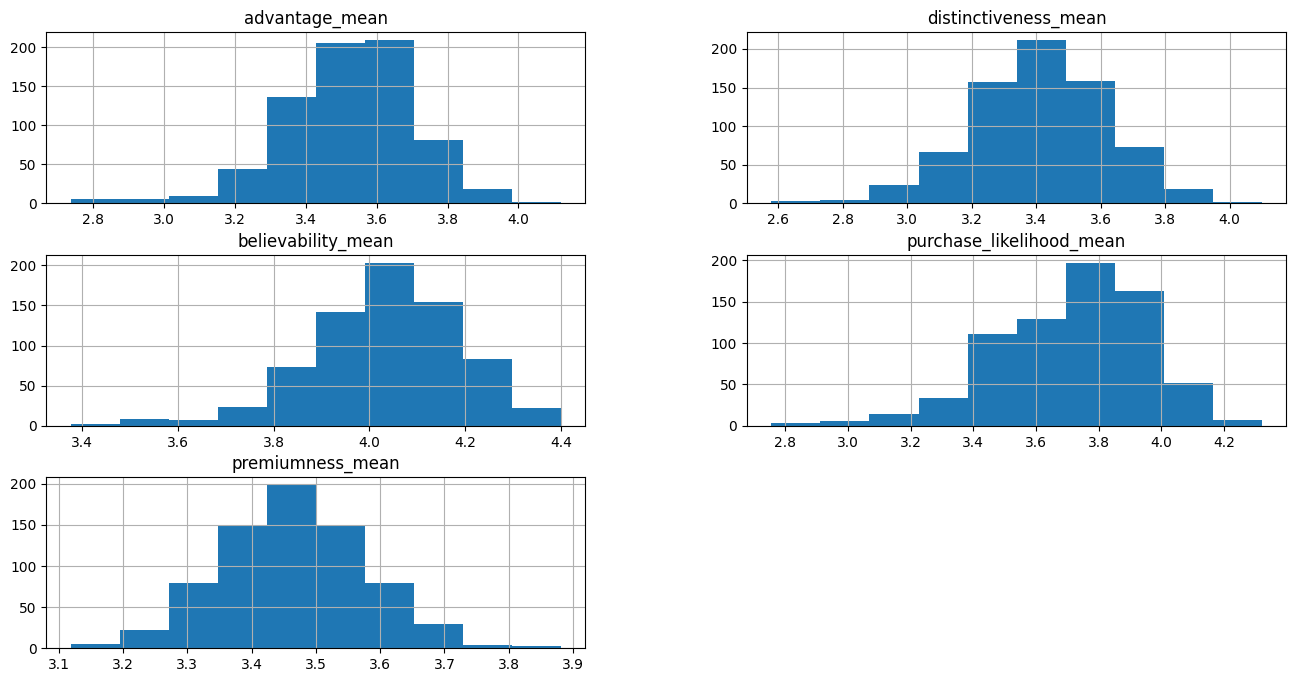

In [5]:
metrics = ['advantage_mean', 'distinctiveness_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']

slice[metrics].hist(figsize=(16,8))

In [6]:
'''
import pandas as pd
from itertools import combinations

def find_combinations(dataframe, exclude_columns):
    column_names = [col for col in dataframe.columns if col not in exclude_columns]
    combinations_list = []

    for r in range(1, len(column_names) + 1):
        for combo in combinations(column_names, r):
            combinations_list.append(combo)

    return combinations_list

combinations_list = find_combinations(slice, metrics)

result_rows = []

for combo in combinations_list:
    combo_slice = slice[list(combo)]
    rows_with_all_ones = combo_slice[(combo_slice == 1).all(axis=1)]

    if not rows_with_all_ones.empty:
        print(f"Combo {combo}:")
        print(rows_with_all_ones)  # Print matching rows for this combination
        result_rows.append(rows_with_all_ones)

result_df = pd.concat(result_rows, ignore_index=True)

print("Result DataFrame:")
print(result_df)
'''

'\nimport pandas as pd\nfrom itertools import combinations\n\ndef find_combinations(dataframe, exclude_columns):\n    column_names = [col for col in dataframe.columns if col not in exclude_columns]\n    combinations_list = []\n\n    for r in range(1, len(column_names) + 1):\n        for combo in combinations(column_names, r):\n            combinations_list.append(combo)\n\n    return combinations_list\n\ncombinations_list = find_combinations(slice, metrics)\n\nresult_rows = []\n\nfor combo in combinations_list:\n    combo_slice = slice[list(combo)]\n    rows_with_all_ones = combo_slice[(combo_slice == 1).all(axis=1)]\n\n    if not rows_with_all_ones.empty:\n        print(f"Combo {combo}:")\n        print(rows_with_all_ones)  # Print matching rows for this combination\n        result_rows.append(rows_with_all_ones)\n\nresult_df = pd.concat(result_rows, ignore_index=True)\n\nprint("Result DataFrame:")\nprint(result_df)\n'

In [7]:
split_cols = [col.split('_mapped_clean_') for col in slice.columns]
split_cols

[['concept_id'],
 ['advantage_mean'],
 ['advantage_stdev'],
 ['advantage_median'],
 ['believability_mean'],
 ['believability_stdev'],
 ['believability_median'],
 ['distinctiveness_mean'],
 ['distinctiveness_stdev'],
 ['distinctiveness_median'],
 ['purchase_likelihood_mean'],
 ['purchase_likelihood_stdev'],
 ['purchase_likelihood_median'],
 ['premiumness_mean'],
 ['premiumness_stdev'],
 ['premiumness_median'],
 ['advantage_top_box'],
 ['distinctiveness_top_box'],
 ['purchase_likelihood_top_box'],
 ['believability_top_box'],
 ['premiumness_top_box'],
 ['one or multiple flavors', 'One Flavour'],
 ['one product or product mix', 'One Product'],
 ['ingredients mentioned in the flavor names', 'Cheese'],
 ['types of snack does it describe', 'Puffs'],
 ['types of snack does it describe', 'Chips'],
 ['textures described', 'Crispy'],
 ['textures described', 'Crunchy'],
 ['taste profile', 'Cheesy'],
 ['when, where or why does it explicitly suggest using or having the snack',
  'Sharing'],
 ['shape

### Creating A New DataFrame With Filtered Columns

#### All Tags DataFrame

In [8]:
# Define the keywords you want to search for
keywords = metrics + ['concept_id']
print(keywords)
# Filter columns that contain any of the keywords
#tag_filter = [col for col in slice.columns if any(keyword in col for keyword in keywords)]

# Create a new dataframe with only the filtered columns
#tags_slice = slice[tag_filter]

tags_slice = slice.copy()
# Create an empty list to store flavors
tags = []

# For every column which includes a flavor replace name with that flavor and save to flavors list
for str in tags_slice.columns:
    if '_mapped_clean_' in str:
        #tag = str.replace('_mapped_clean_', '')
        tags.append(str)

# Rename columns dynamically
#tags_slice.columns = tags_slice.columns.str.replace('names_mapped_clean_', '')

tags_slice

['advantage_mean', 'distinctiveness_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean', 'concept_id']


concept_id  advantage_mean  advantage_stdev  advantage_median  \
0         45561        3.866748         1.012883                 4   
1         45562        3.598365         0.993976                 4   
2         45563        3.496965         1.045463                 3   
3         45564        3.794805         0.866135                 4   
4         45565        3.420002         1.048521                 3   
..          ...             ...              ...               ...   
712      147533        3.671478         1.004650                 4   
713      147534        3.651767         1.071277                 4   
714      147535        3.604257         0.979745                 4   
715      147536        3.383851         0.967111                 3   
716      147537        3.643599         0.989505                 4   

     believability_mean  believability_stdev  believability_median  \
0              4.109224             0.959518                     4   
1              3.995791             0.855829                     4   
2              4.052792             0.896170                     4   
3              4.136182             0.847042                     4   
4              3.977261             0.938561                     4   
..                  ...                  ...                   ...   
712            4.105840             0.890645                     4   
713            4.088976             0.915078                     4   
714            4.099988             0.846744                     4   
715            3.967173             0.844314                     4   
716            4.139543             0.807218                     4   

     distinctiveness_mean  distinctiveness_stdev  distinctiveness_median  \
0                3.561590               1.293614                       2   
1                3.444236               1.257179                       3   
2                3.065852               1.298462                       3   
3                3.366229               1.247739                       3   
4                3.830943               1.168593                       2   
..                    ...                    ...                     ...   
712              3.373505               1.333322                       2   
713              3.177538               1.208302                       3   
714              3.107376               1.234771                       3   
715              3.254420               1.261914                       3   
716              3.161732               1.215798                       3   

     purchase_likelihood_mean  purchase_likelihood_stdev  \
0                    3.924676                   1.180654   
1                    3.850502                   1.180926   
2                    3.720136                   1.152225   
3                    4.173971                   0.947572   
4                    3.597212                   1.444486   
..                        ...                        ...   
712                  4.000096                   1.131540   
713                  3.886853                   1.052418   
714                  3.905659                   0.950075   
715                  3.523927                   1.239057   
716                  4.088927                   0.959543   

     purchase_likelihood_median  premiumness_mean  premiumness_stdev  \
0                             4          3.633249           0.856288   
1                             4          3.416570           0.915382   
2                             4          3.385568           0.947569   
3                             4          3.605408           0.828609   
4                             4          3.421862           0.852104   
..                          ...               ...                ...   
712                           4          3.535410           0.968686   
713                           4          3.564584           0.892036   
714                           4          

In [9]:
# Creates an empty list to store where two tags exist at the same time
tag_combinations = {}
combination_count = 0

for i in range(len(tags_slice)):  # Iterate through rows
    for tag in tags:
        if tags_slice[tag].iloc[i] == 1:  # Check if the current row has tag = 1
            for tag2 in tags:
                if tag != tag2 and tags_slice[tag2].iloc[i] == 1:  # Check if the current row has tag2 = 1
                    combination_count += 1
                    tag_combinations[tag] = tag2

print("Number of combinations:", combination_count)

print(tag_combinations)

for key, value in tag_combinations.items():
    print(f"{key}: {value}")


Number of combinations: 88010
{'one product or product mix_mapped_clean_One Product': 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'types of snack does it describe_mapped_clean_Puffs': 'textures described_mapped_clean_Soft', 'taste profile_mapped_clean_Cheesy': 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'one or multiple flavors_mapped_clean_Multiple Flavours': 'shapes mentioned_mapped_clean_Round', 'taste profile_mapped_clean_Spicy': 'taste profile_mapped_clean_Fruity', 'explicitly claimed health or lifestyle benefits_mapped_clean_High Protein': 'explicitly claimed health or lifestyle benefits_mapped_clean_Source of Fibre', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Defeat hunger': 'explicitly claimed health or lifestyle benefits_mapped_clean_Filling', 'explicitly claimed health or lifestyle benefits_mapped_clean_Nutritious': 'when, where or why does it explicitly suggest using or having the snack_mapped

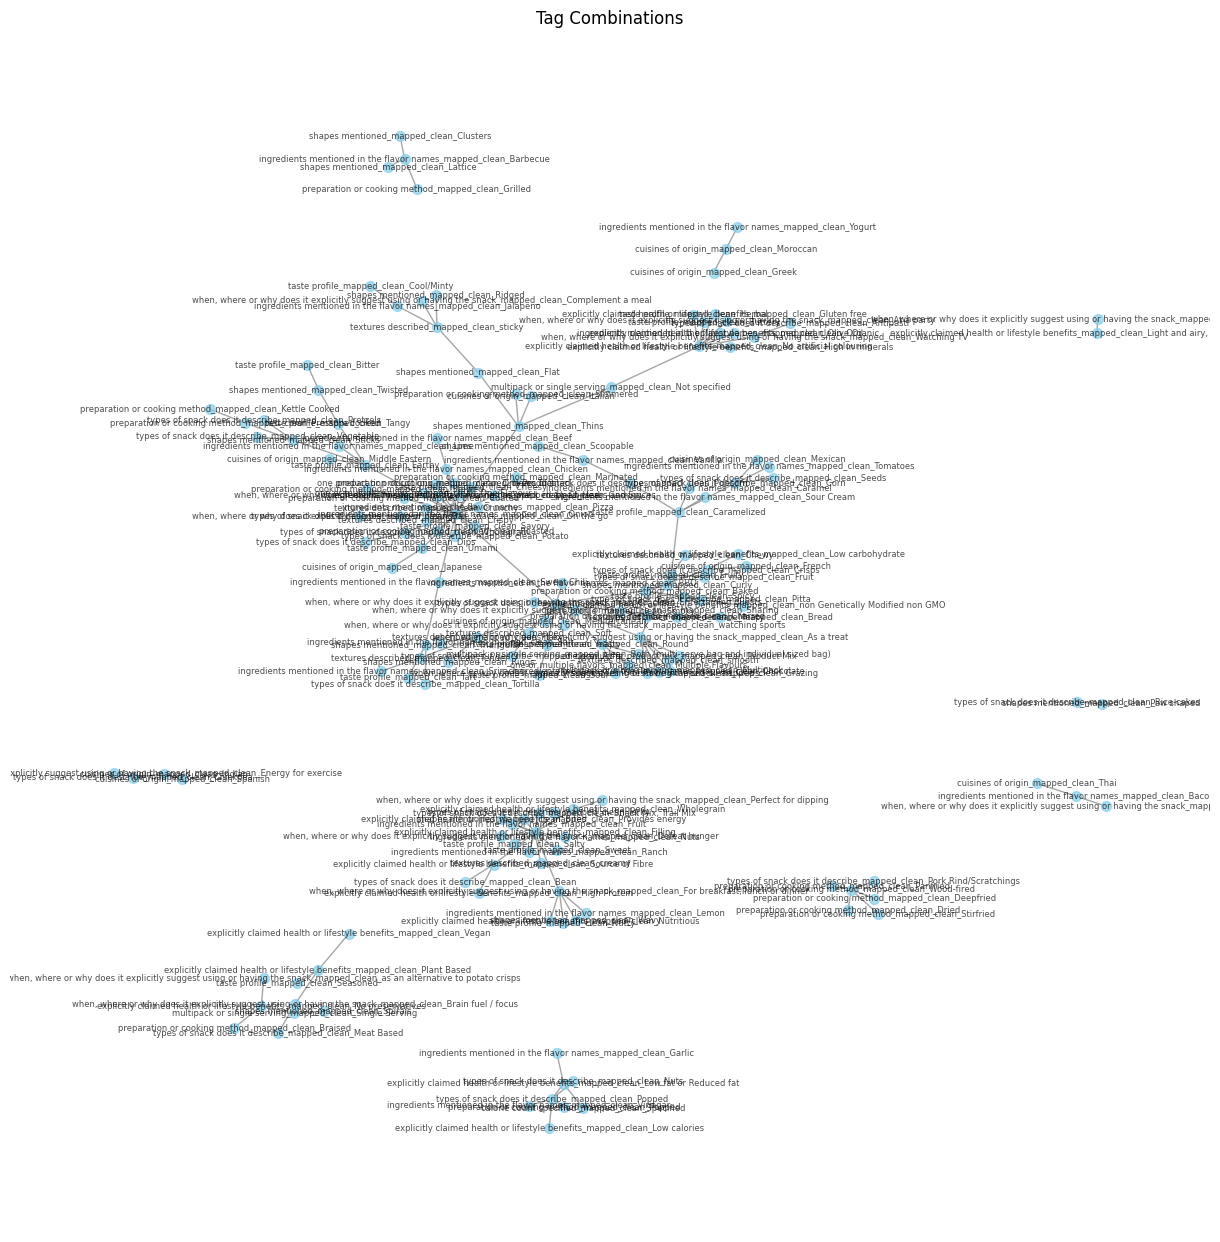

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Iterate through the tag combinations and add them to the graph as edges
for key, value in tag_combinations.items():
    G.add_edge(key, value)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)

# Adjust font size and label positioning
labels = {}


for node in G.nodes():
    labels[node] = node  # This assigns the node's name as the label

nx.draw(G, pos, labels=labels, node_size=50, font_size=6, node_color='skyblue', edge_color='gray', font_color='black', alpha=0.7)
plt.title("Tag Combinations")
plt.show()


In [11]:
'''
edge_trace = []
node_trace = []

for key, value in tag_combinations.items():
    edge_trace.append[key]
    node_trace.append[value]

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()
'''

'\nedge_trace = []\nnode_trace = []\n\nfor key, value in tag_combinations.items():\n    edge_trace.append[key]\n    node_trace.append[value]\n\nfig = go.Figure(data=[edge_trace, node_trace],\n             layout=go.Layout(\n                title=\'<br>Network graph made with Python\',\n                titlefont_size=16,\n                showlegend=False,\n                hovermode=\'closest\',\n                margin=dict(b=20,l=5,r=5,t=40),\n                annotations=[ dict(\n                    text="Python code: <a href=\'https://plotly.com/ipython-notebooks/network-graphs/\'> https://plotly.com/ipython-notebooks/network-graphs/</a>",\n                    showarrow=False,\n                    xref="paper", yref="paper",\n                    x=0.005, y=-0.002 ) ],\n                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),\n                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))\n                )\nfig.show()\n'

In [12]:
import pandas as pd

# Initialize a list to store metrics for each combination
combination_metrics = []

desired_order = ['advantage_mean', 'distinctiveness_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']

def calculate_combined_metric(filtered_df, metrics):
    result = {}
    
    for metric in metrics:
        metric_values = filtered_df[metric].values
        result[metric] = metric_values.mean()  # Calculate the metric as needed
        
    return result

# Loop through the tag combinations
for tag1, tag2 in tag_combinations.items():
    # Filter rows where both tags are equal to 1
    filtered_df = tags_slice[(tags_slice[tag1] == 1) & (tags_slice[tag2] == 1)]
    
    result = calculate_combined_metric(filtered_df, desired_order)
    #print(result)
    
    # Append the metric values to the combination_metrics list
    # Include tag1 and tag2 only in the row where they are both 1
    if not filtered_df.empty:
        combination_metrics.append({'Tag1': tag1, 'Tag2': tag2, **result})


print(combination_metrics)

# Create a DataFrame from the combination metrics
combination_metrics_df = pd.DataFrame(combination_metrics)

# Display the resulting DataFrame
combination_metrics_df

[{'Tag1': 'one product or product mix_mapped_clean_One Product', 'Tag2': 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'advantage_mean': 3.537928343342857, 'distinctiveness_mean': 3.3914628788285714, 'believability_mean': 4.0372620814, 'purchase_likelihood_mean': 3.796383057342857, 'premiumness_mean': 3.492711993514286}, {'Tag1': 'types of snack does it describe_mapped_clean_Puffs', 'Tag2': 'textures described_mapped_clean_Soft', 'advantage_mean': 3.42629143075, 'distinctiveness_mean': 3.39139169875, 'believability_mean': 4.01292201125, 'purchase_likelihood_mean': 3.7627385739999997, 'premiumness_mean': 3.36335480175}, {'Tag1': 'taste profile_mapped_clean_Cheesy', 'Tag2': 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'advantage_mean': 3.5538354374444445, 'distinctiveness_mean': 3.3824327377777776, 'believability_mean': 4.090524134222222, 'purchase_likelihood_mean': 3.875532284777778, 'premiumness_mean': 3.440763296888889}, {'Tag1': 'one or multiple f

Tag1  \
0    one product or product mix_mapped_clean_One Pr...   
1    types of snack does it describe_mapped_clean_P...   
2                    taste profile_mapped_clean_Cheesy   
3    one or multiple flavors_mapped_clean_Multiple ...   
4                     taste profile_mapped_clean_Spicy   
..                                                 ...   
169  types of snack does it describe_mapped_clean_Bean   
170                    taste profile_mapped_clean_Tart   
171  multipack or single serving_mapped_clean_Not s...   
172  preparation or cooking method_mapped_clean_Pre...   
173  preparation or cooking method_mapped_clean_Gri...   

                                                  Tag2  advantage_mean  \
0    ingredients mentioned in the flavor names_mapp...        3.537928   
1                 textures described_mapped_clean_Soft        3.426291   
2    ingredients mentioned in the flavor names_mapp...        3.553835   
3                  shapes mentioned_mapped_clean_Round        3.499209   
4                    taste profile_mapped_clean_Fruity        3.849514   
..                                                 ...             ...   
169  explicitly claimed health or lifestyle benefit...        3.671478   
170           shapes mentioned_mapped_clean_Triangular        2.760945   
171                shapes mentioned_mapped_clean_Thins        3.309482   
172               shapes mentioned_mapped_clean_Sticks        3.515679   
173  ingredients mentioned in the flavor names_mapp...        3.399588   

     distinctiveness_mean  believability_mean  purchase_likelihood_mean  \
0                3.391463            4.037262                  3.796383   
1                3.391392            4.012922                  3.762739   
2                3.382433            4.090524                  3.875532   
3                3.364065            4.082839                  3.753467   
4                2.966776            4.254897                  3.936184   
..                    ...                 ...                       ...   
169              3.373505            4.105840                  4.000096   
170              3.702216            3.376345                  2.922446   
171              3.309862            4.054212                  3.458999   
172              3.300102            4.100441                  3.859391   
173              3.616700            4.025613                  3.744372   

     premiumness_mean  
0            3.492712  
1            3.363355  
2            3.440763  
3            3.409077  
4            3.694338  
..                ...  
169          3.535410  
170          3.276543  
171          3.321595  
172          3.403004  
173          3.330373  

[174 rows x 7 columns]

### T-Test
A t-test is a statistical method used to determine if there is a significant difference between the means of two groups or samples in a dataset. It assesses whether the observed differences between the group means are likely to have occurred due to chance or if they are statistically significant.

#### Iterating through each tag and calculating the significance of its presence compared to its absence for every possible metric:

In [13]:
from scipy import stats

# Creates dictionary to score P-values

P_values_tags = {}

for tag in tags:
    for metric in metrics:
        # Separate distinctiveness_mean for Beef and Jalapeno
        metric_tag = tags_slice[tags_slice[tag] == 1][metric]
        metric_not_tag = tags_slice[tags_slice[tag] == 0][metric]
        
        # Perform a t-test to compare premiumness between Beef and Jalapeno
        t_stat, p_value = stats.ttest_ind(metric_tag, metric_not_tag)

        
        # Output the results
        print(tag)
        print("T-statistic:", t_stat)
        print("P-value:", p_value)
        P_values_tags[f"{tag} {metric}"] = p_value
        
        # Check if the difference is statistically significant at a significance level of 0.05
        if p_value < 0.05:
            print(f"There is a statistically significant difference between {tag} and Not {tag} {metric}.")
        else:
            print(f"There is no statistically significant difference between {tag} and Not {tag} {metric}.")



print("\n", P_values_tags.items())
print("\nTag and Metric with most significant difference: ", min(P_values_tags, key=P_values_tags.get))


# Find the 10 minimum values and their corresponding keys
ten_min_items = sorted(P_values_tags.items(), key=lambda x: x[1])[:10]

print("Ten most significant Tag and Metric pairs:")
for key, value in ten_min_items:
    print(f"{key}: {value}")

one or multiple flavors_mapped_clean_One Flavour
T-statistic: -1.071201250030122
P-value: 0.28444039615684047
There is no statistically significant difference between one or multiple flavors_mapped_clean_One Flavour and Not one or multiple flavors_mapped_clean_One Flavour advantage_mean.
one or multiple flavors_mapped_clean_One Flavour
T-statistic: 1.501626833018095
P-value: 0.1336349877395328
There is no statistically significant difference between one or multiple flavors_mapped_clean_One Flavour and Not one or multiple flavors_mapped_clean_One Flavour distinctiveness_mean.
one or multiple flavors_mapped_clean_One Flavour
T-statistic: 0.4511610421978649
P-value: 0.6520102830694519
There is no statistically significant difference between one or multiple flavors_mapped_clean_One Flavour and Not one or multiple flavors_mapped_clean_One Flavour believability_mean.
one or multiple flavors_mapped_clean_One Flavour
T-statistic: -1.3178015571159882
P-value: 0.18799215157313737
There is no sta

In [14]:
marked = []

print("Ten most significant unique Tag and Metric pairs:")
for key, value in ten_min_items:
    if key not in marked:
        print(f"{key}: {value}")
        marked.append(key)

Ten most significant unique Tag and Metric pairs:
multipack or single serving_mapped_clean_Multipack distinctiveness_mean: 1.521933896913108e-19
multipack or single serving_mapped_clean_Multipack advantage_mean: 3.47464711242568e-12
one product or product mix_mapped_clean_One Product distinctiveness_mean: 1.277295557474036e-10
one product or product mix_mapped_clean_Product Mix distinctiveness_mean: 1.277295557474036e-10
when, where or why does it explicitly suggest using or having the snack_mapped_clean_Perfect for dipping believability_mean: 1.5347019962573749e-09
multipack or single serving_mapped_clean_Multipack premiumness_mean: 6.587920346750303e-09
taste profile_mapped_clean_Cheesy purchase_likelihood_mean: 2.7946753624055467e-08
types of snack does it describe_mapped_clean_Potato purchase_likelihood_mean: 6.519333851353697e-08
ingredients mentioned in the flavor names_mapped_clean_Sweet Chili premiumness_mean: 1.2140591633363459e-07
types of snack does it describe_mapped_clean_


Ten most significant Tags for advantage_mean:

multipack or single serving_mapped_clean_Multipack advantage_mean: 0.9999999999965253
one product or product mix_mapped_clean_One Product advantage_mean: 0.9999996962458367
one product or product mix_mapped_clean_Product Mix advantage_mean: 0.9999996962458367
types of snack does it describe_mapped_clean_Wholegrain advantage_mean: 0.9999820316995729
taste profile_mapped_clean_Sweet advantage_mean: 0.9999243544764006
explicitly claimed health or lifestyle benefits_mapped_clean_Wholegrain advantage_mean: 0.9999234529625864
explicitly claimed health or lifestyle benefits_mapped_clean_Nutritious advantage_mean: 0.9998397342591122
when, where or why does it explicitly suggest using or having the snack_mapped_clean_Perfect for dipping advantage_mean: 0.9997517241734527
preparation or cooking method_mapped_clean_Baked advantage_mean: 0.9996981852467324
types of snack does it describe_mapped_clean_Pretzels advantage_mean: 0.9996721313782598


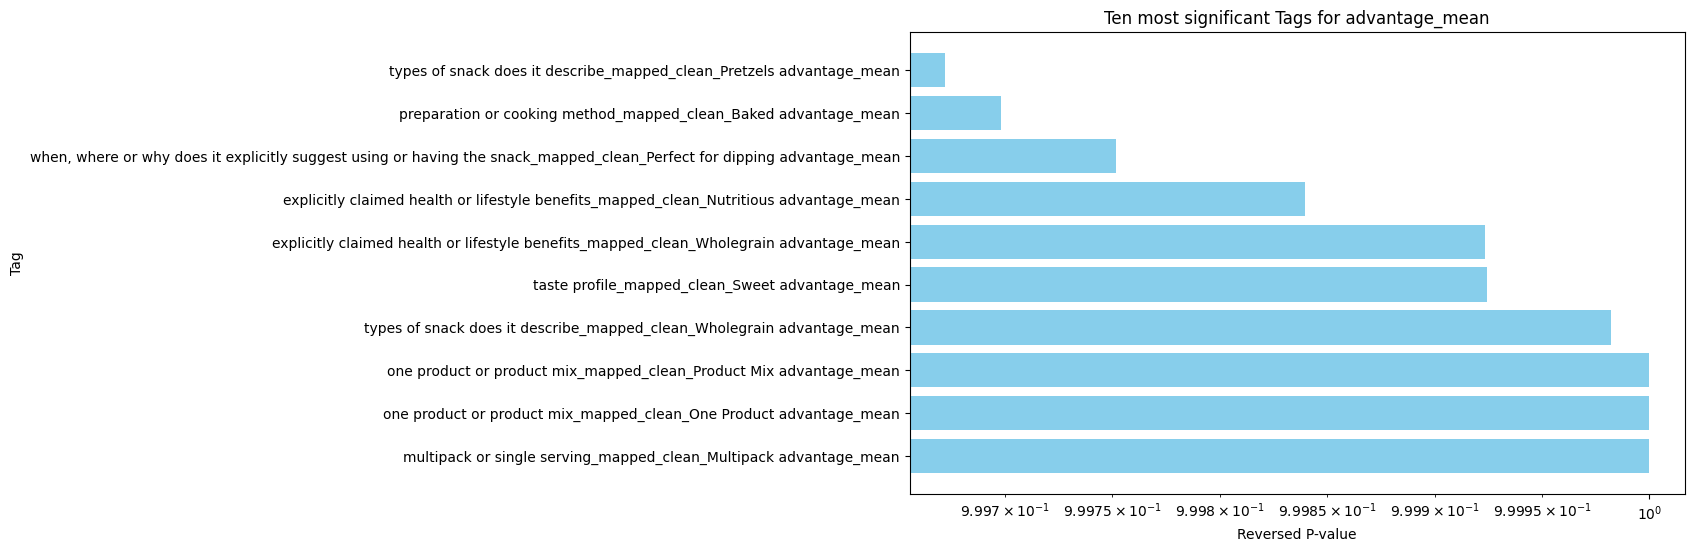


Ten most significant Tags for distinctiveness_mean:

multipack or single serving_mapped_clean_Multipack distinctiveness_mean: 1.0
one product or product mix_mapped_clean_One Product distinctiveness_mean: 0.9999999998722704
one product or product mix_mapped_clean_Product Mix distinctiveness_mean: 0.9999999998722704
types of snack does it describe_mapped_clean_Meat Based distinctiveness_mean: 0.9999986064332282
types of snack does it describe_mapped_clean_Wholegrain distinctiveness_mean: 0.9999977556983075
explicitly claimed health or lifestyle benefits_mapped_clean_non Genetically Modified non GMO distinctiveness_mean: 0.9999648421981734
explicitly claimed health or lifestyle benefits_mapped_clean_Wholegrain distinctiveness_mean: 0.9999579577357779
types of snack does it describe_mapped_clean_Jerky distinctiveness_mean: 0.9999391544042329
ingredients mentioned in the flavor names_mapped_clean_Beef distinctiveness_mean: 0.9999061846270866
explicitly claimed health or lifestyle benefits_

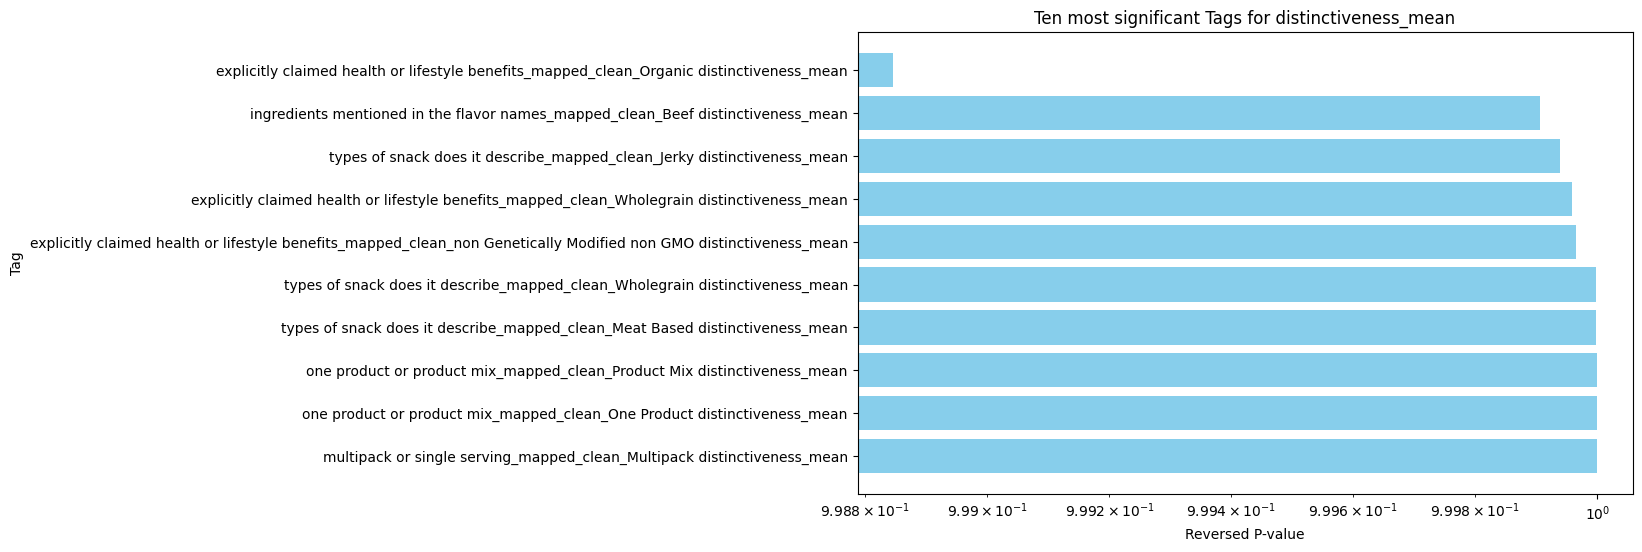


Ten most significant Tags for believability_mean:

when, where or why does it explicitly suggest using or having the snack_mapped_clean_Perfect for dipping believability_mean: 0.999999998465298
multipack or single serving_mapped_clean_Multipack believability_mean: 0.9999997179648391
when, where or why does it explicitly suggest using or having the snack_mapped_clean_As a treat believability_mean: 0.9999997138569804
types of snack does it describe_mapped_clean_Vegetable believability_mean: 0.9999946641097542
taste profile_mapped_clean_Cheesy believability_mean: 0.9999845164365372
types of snack does it describe_mapped_clean_Pretzels believability_mean: 0.9999394104104936
taste profile_mapped_clean_Spicy believability_mean: 0.9998789112462361
types of snack does it describe_mapped_clean_Tortilla believability_mean: 0.9995139722634541
taste profile_mapped_clean_Tangy believability_mean: 0.9993948562610643
types of snack does it describe_mapped_clean_Potato believability_mean: 0.999152096

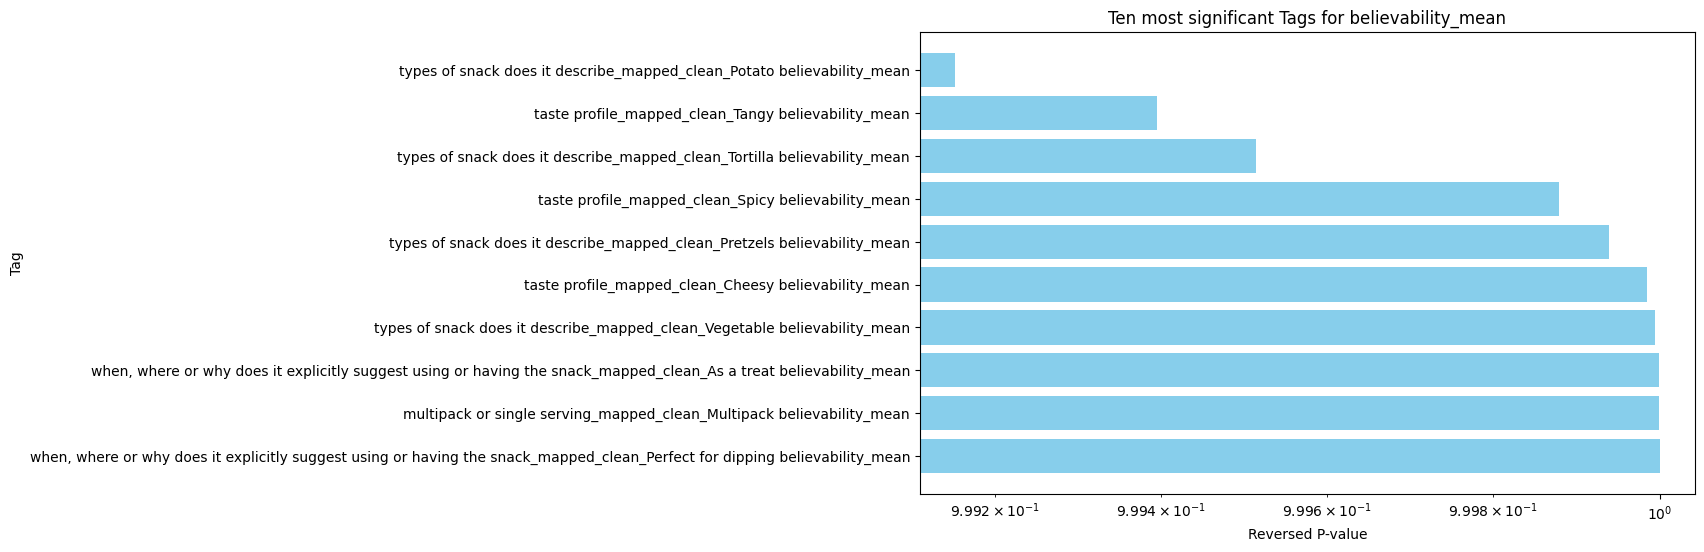


Ten most significant Tags for purchase_likelihood_mean:

taste profile_mapped_clean_Cheesy purchase_likelihood_mean: 0.9999999720532464
types of snack does it describe_mapped_clean_Potato purchase_likelihood_mean: 0.9999999348066615
when, where or why does it explicitly suggest using or having the snack_mapped_clean_As a treat purchase_likelihood_mean: 0.9999998003272863
ingredients mentioned in the flavor names_mapped_clean_Cheese purchase_likelihood_mean: 0.9999994856798187
multipack or single serving_mapped_clean_Multipack purchase_likelihood_mean: 0.9999994241684137
types of snack does it describe_mapped_clean_Vegetable purchase_likelihood_mean: 0.9999983955327132
types of snack does it describe_mapped_clean_Bar purchase_likelihood_mean: 0.9999630087142417
taste profile_mapped_clean_Sweet purchase_likelihood_mean: 0.9998221083756939
one product or product mix_mapped_clean_One Product purchase_likelihood_mean: 0.9996410316043192
one product or product mix_mapped_clean_Product Mix p

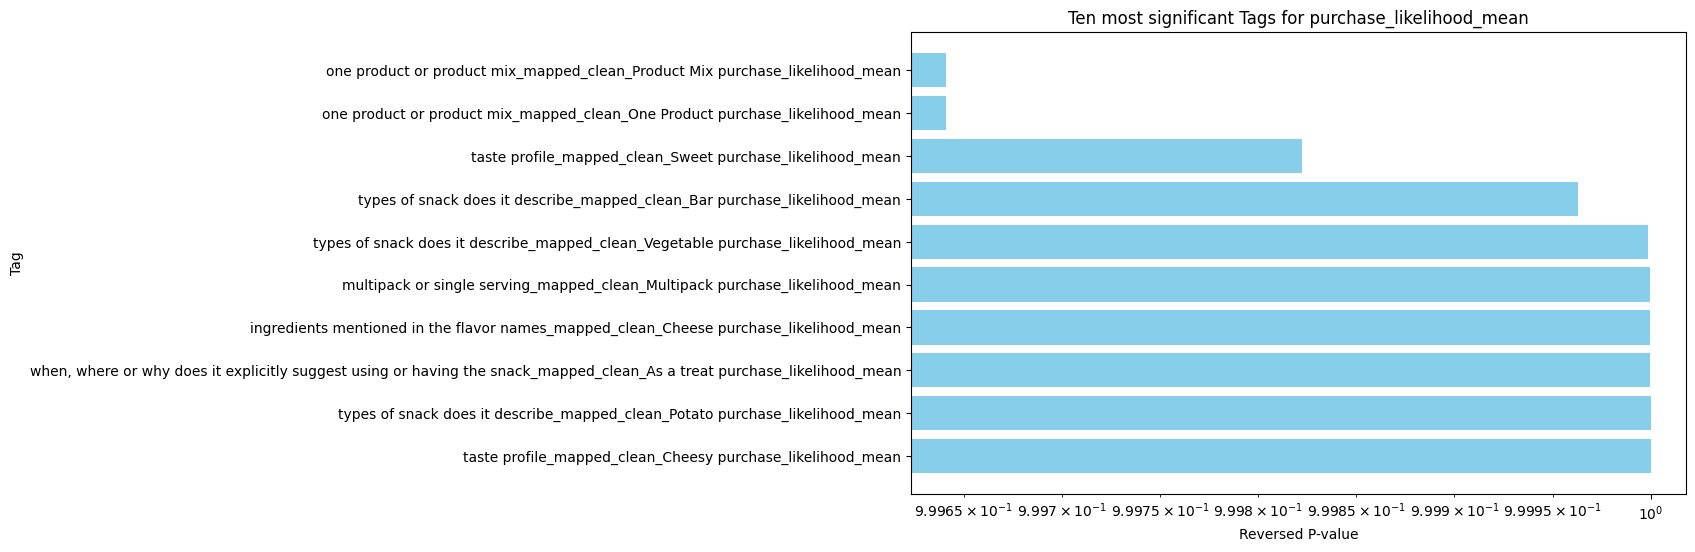


Ten most significant Tags for premiumness_mean:

multipack or single serving_mapped_clean_Multipack premiumness_mean: 0.9999999934120797
ingredients mentioned in the flavor names_mapped_clean_Sweet Chili premiumness_mean: 0.9999998785940837
types of snack does it describe_mapped_clean_Puffs premiumness_mean: 0.9999998108444718
types of snack does it describe_mapped_clean_Pretzels premiumness_mean: 0.9999870227892736
taste profile_mapped_clean_Spicy premiumness_mean: 0.9999868151706323
types of snack does it describe_mapped_clean_Wholegrain premiumness_mean: 0.999919626821908
one product or product mix_mapped_clean_One Product premiumness_mean: 0.9998367176898042
one product or product mix_mapped_clean_Product Mix premiumness_mean: 0.9998367176898042
ingredients mentioned in the flavor names_mapped_clean_Nuts premiumness_mean: 0.9997941116394353
ingredients mentioned in the flavor names_mapped_clean_Chocolate premiumness_mean: 0.9992204539883851


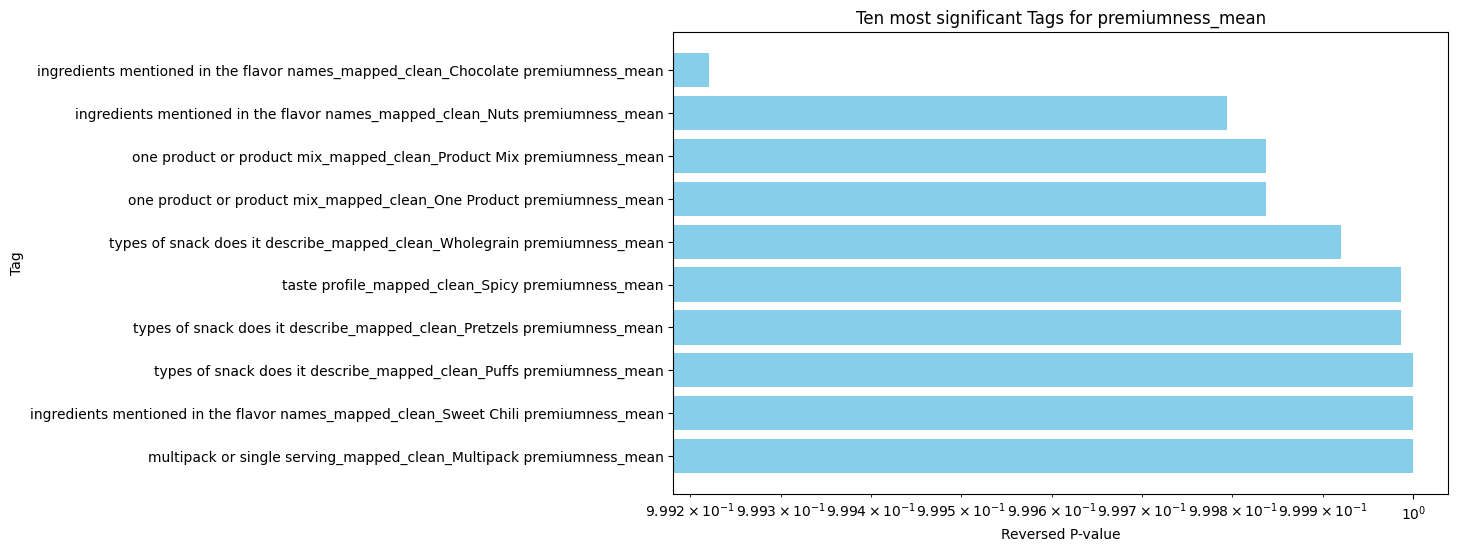

In [15]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for logarithmic scaling

# Assuming you have defined min_items, metrics, and tags lists
# (min_items is a list of (key, value) pairs, metrics and tags are lists of strings)

# Find the 10 minimum values and their corresponding keys
min_items = sorted(P_values_tags.items(), key=lambda x: x[1])

# Iterate through the metrics
for metric in metrics:
    print("\nTen most significant Tags for " + metric + ":\n")
    count = 0
    metric_tags = []  # Store the tags for the current metric
    metric_values = []  # Store the corresponding values for the current metric

    # Iterate through the min_items, stopping after 10 iterations for each metric
    for key, value in min_items:
        if metric in key:
            print(f"{key}: {1 - value}")  # Reverse the significance value
            count += 1
            metric_tags.append(key)
            metric_values.append(1 - value)  # Reverse the significance value
            if count >= 10:
                break

    # Create a bar chart for the current metric using Seaborn and Pandas
    plt.figure(figsize=(10, 6))
    plt.title(f"Ten most significant Tags for {metric}")
    plt.barh(metric_tags, metric_values, color='skyblue')
    plt.xlabel("Reversed P-value")
    plt.ylabel("Tag")
    plt.xscale('log')  # Use logarithmic scaling for the x-axis
    plt.show()


In [16]:
advantage_multipack = tags_slice[tags_slice['multipack or single serving_mapped_clean_Multipack'] == 1]['advantage_mean'].mean()
advantage_no_multipack = tags_slice[tags_slice['multipack or single serving_mapped_clean_Multipack'] == 0]['advantage_mean'].mean()

print("Advantage mean with Multipack: ", advantage_multipack)
print("Advantage mean without Multipack: ", advantage_no_multipack)

print(advantage_multipack/advantage_no_multipack)
print(advantage_multipack - advantage_no_multipack)

Advantage mean with Multipack:  3.823573480764706
Advantage mean without Multipack:  3.5148397247342857
1.0878372216684105
0.3087337560304202


A **multipack** product will increase **advantage** by **8%**

#### Amount of multipack products:

In [17]:
tags_slice['multipack or single serving_mapped_clean_Multipack'].sum()

17

#### Boxplots for advantage mean of Multipack products

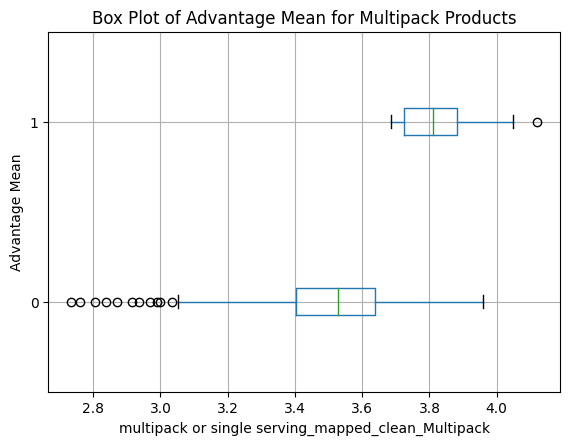

In [18]:
import matplotlib.pyplot as plt

tags_slice.boxplot(column='advantage_mean', by='multipack or single serving_mapped_clean_Multipack', vert=False)
plt.title('Box Plot of Advantage Mean for Multipack Products')
plt.xlabel('multipack or single serving_mapped_clean_Multipack')
plt.ylabel('Advantage Mean')
plt.suptitle('')  # Remove the default title created by Pandas
plt.show()

#### Histogram for advantage mean of Multipack products

In [19]:
#advantage_multipack.hist(figsize=(16,8))

In [20]:
#advantage_no_multipack.hist(figsize=(16,8))

#### Seaborn Barplot

<Axes: xlabel='ingredients mentioned in the flavor names_mapped_clean_Cheese', ylabel='advantage_mean'>

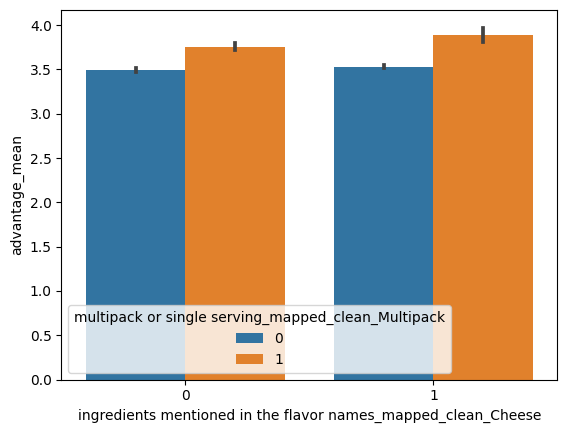

In [21]:
import seaborn as sns

sns.barplot(data=tags_slice, x='ingredients mentioned in the flavor names_mapped_clean_Cheese', y="advantage_mean", hue="multipack or single serving_mapped_clean_Multipack")

/Users/interniglikristo/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


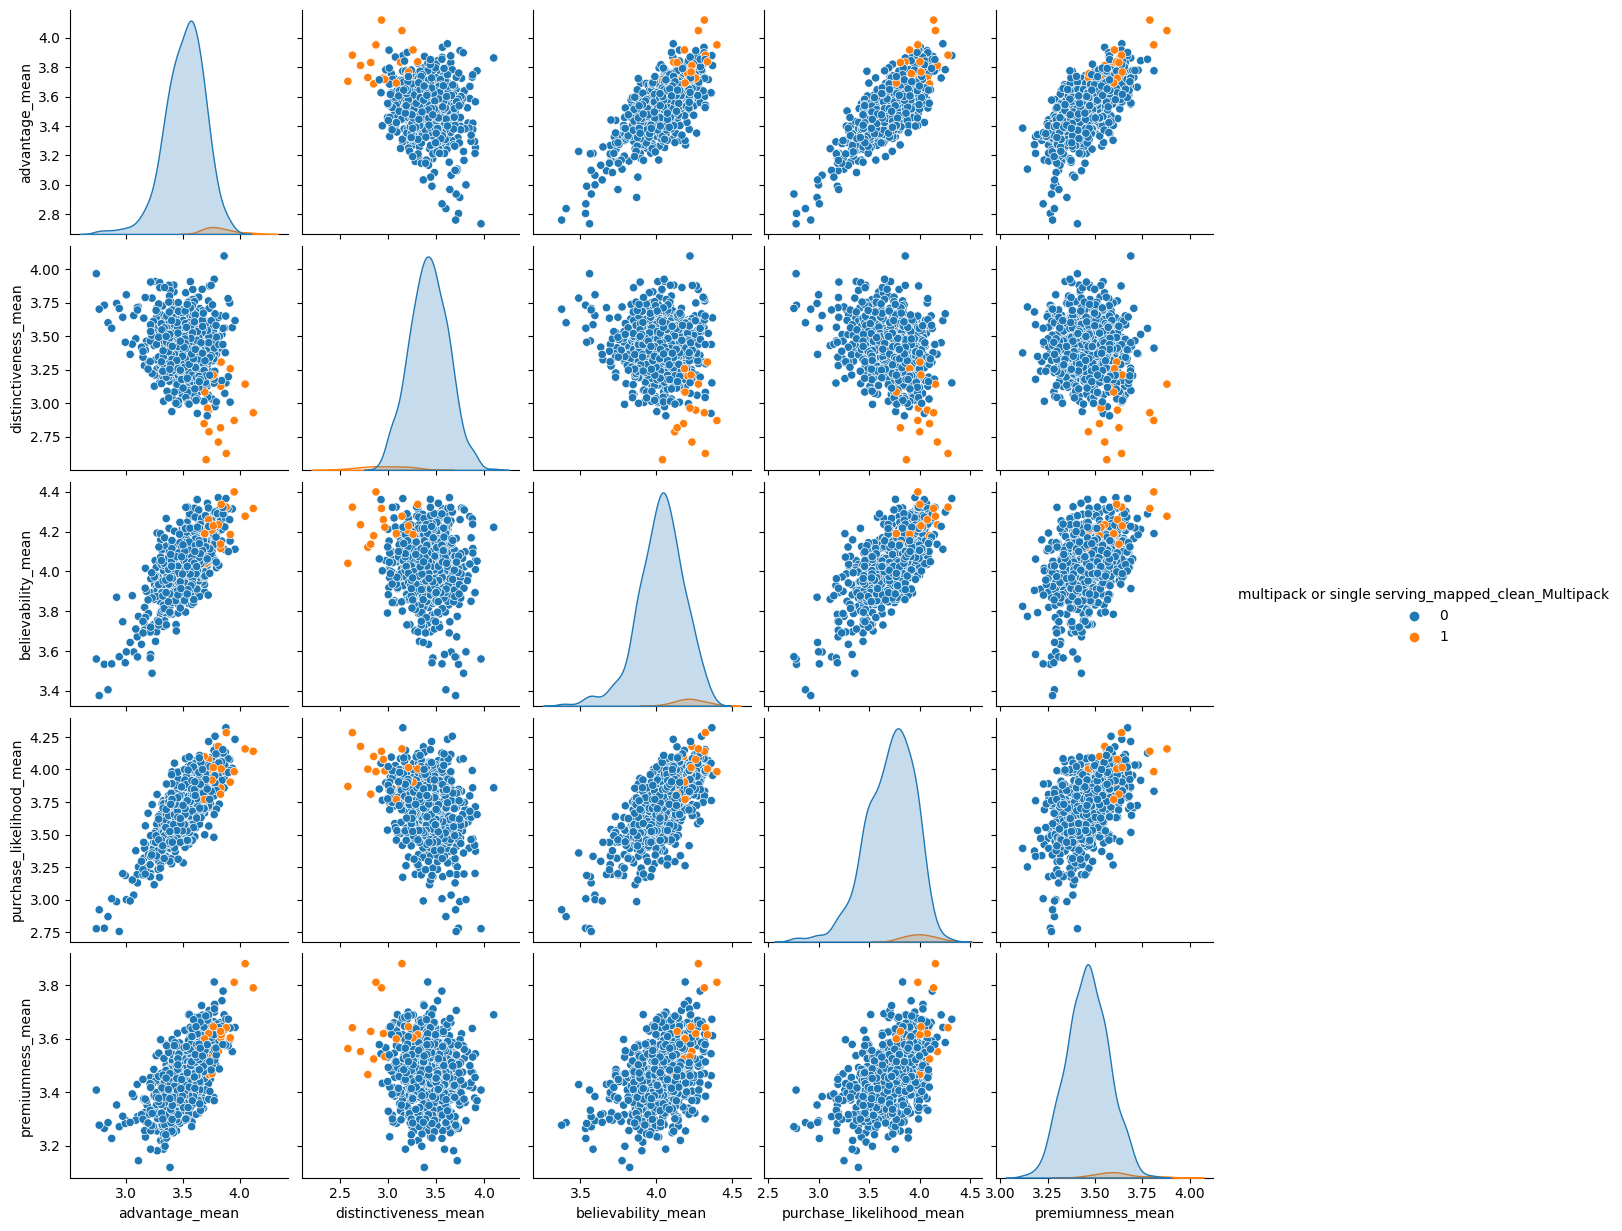

In [22]:
sns.pairplot(tags_slice[metrics + ['multipack or single serving_mapped_clean_Multipack']], hue='multipack or single serving_mapped_clean_Multipack')

/Users/interniglikristo/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


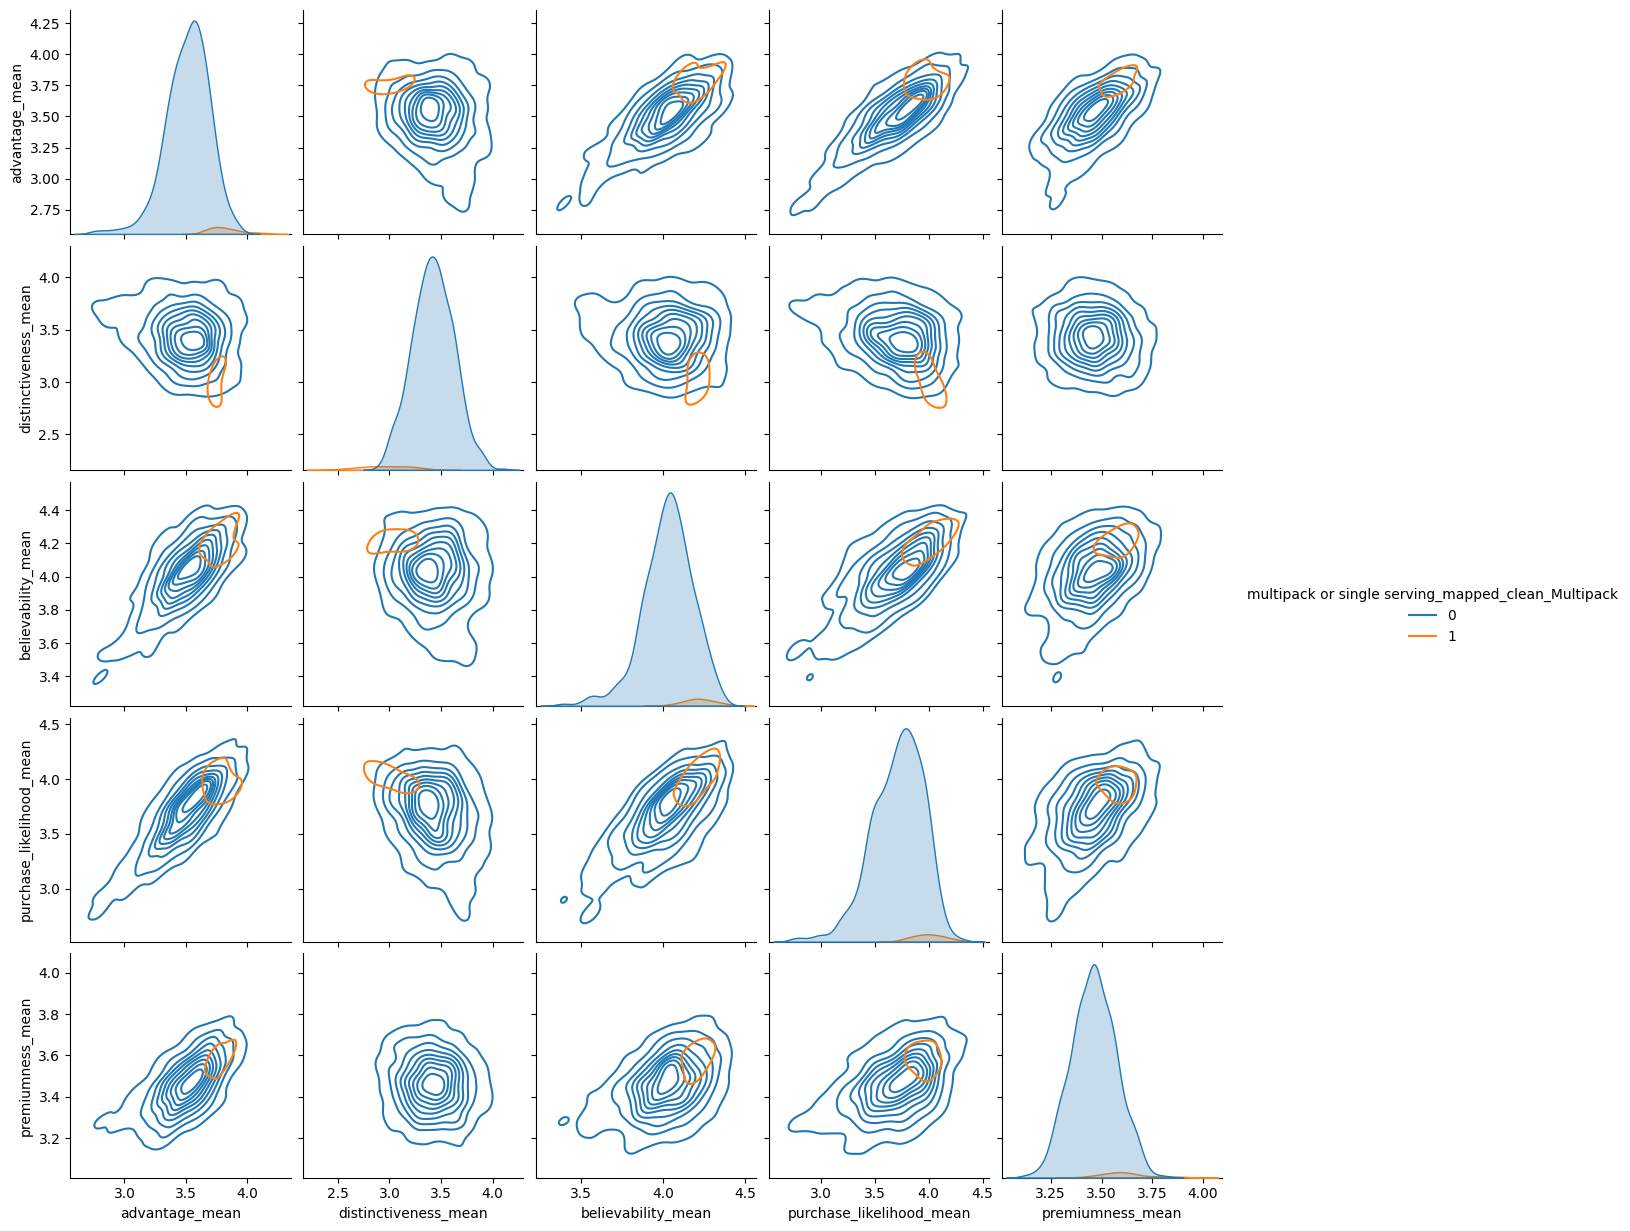

In [23]:
sns.pairplot(tags_slice[metrics + ['multipack or single serving_mapped_clean_Multipack']], hue='multipack or single serving_mapped_clean_Multipack', kind='kde')

#### Flavors DataFrame

In [24]:
flavors_slice.sum(axis=0)

NameError: name 'flavors_slice' is not defined

In [25]:
flavors_slice.Cheese.sum()

NameError: name 'flavors_slice' is not defined

In [26]:
flavors_slice.drop(columns=['concept_id']).sum(axis=0)

NameError: name 'flavors_slice' is not defined

### T-Test

A t-test is a statistical method used to determine if there is a significant difference between the means of two groups or samples in a dataset. It assesses whether the observed differences between the group means are likely to have occurred due to chance or if they are statistically significant.

#### Iterating through each FLAVOR and calculating the significance of its presence compared to its absence for every possible metric:

In [27]:
# Creates dictionary to score P-values

P_values_flavors = {}

for flavor in flavors:
    for metric in metrics:
        # Separate distinctiveness_mean for Beef and Jalapeno
        metric_flavor = flavors_slice[flavors_slice[flavor] == 1][metric]
        metric_not_flavor = flavors_slice[flavors_slice[flavor] == 0][metric]
        
        # Perform a t-test to compare premiumness between Beef and Jalapeno
        t_stat, p_value = stats.ttest_ind(metric_flavor, metric_not_flavor)

        
        # Output the results
        print(flavor)
        print("T-statistic:", t_stat)
        print("P-value:", p_value)
        P_values_flavors[f"{flavor} {metric}"] = p_value
        
        # Check if the difference is statistically significant at a significance level of 0.05
        if p_value < 0.05:
            print(f"There is a statistically significant difference between {flavor} and Not {flavor} {metric}.")
        else:
            print(f"There is no statistically significant difference between {flavor} and Not {flavor} {metric}.")



print("\n", P_values_flavors.items())
print("\nFlavor and Metric with most significant difference: ", min(P_values_flavors, key=P_values_flavors.get))


# Find the 10 minimum values and their corresponding keys
min_items = sorted(P_values_flavors.items(), key=lambda x: x[1])[:10]

print("Ten most significant Flavor and Metric pairs:")
for key, value in min_items:
    print(f"{key}: {value}")


NameError: name 'flavors' is not defined

In [28]:
matthews_corrcoef(flavors_slice['Beef'], flavors_slice['Sweet Chili'])

NameError: name 'flavors_slice' is not defined

In [29]:
purchase_likelihood_cheese = flavors_slice[flavors_slice['Cheese'] == 1]['purchase_likelihood_mean'].mean()
purchase_likelihood_no_cheese = flavors_slice[flavors_slice['Cheese'] == 0]['purchase_likelihood_mean'].mean()

print("Purchase likelihood mean with Cheese: ", purchase_likelihood_cheese)
print("Purchase likelihood mean without Cheese: ", purchase_likelihood_no_cheese)

print(purchase_likelihood_cheese/purchase_likelihood_no_cheese)
print(purchase_likelihood_cheese - purchase_likelihood_no_cheese) 

NameError: name 'flavors_slice' is not defined

#### Nuts distinctiveness box plots

In [30]:
# Create separate box plots for Herbs and Spices = 0 and Herbs and Spices = 1
flavors_slice.boxplot(column='premiumness_mean', by='Nuts', vert=False)
plt.title('Box Plot of Premiumness Mean for Nuts')
plt.xlabel('Nuts')
plt.ylabel('Premiumness Mean')
plt.suptitle('')  # Remove the default title created by Pandas
plt.show()

NameError: name 'flavors_slice' is not defined

In [31]:
flavors_slice.to_csv('Data/flavors_slice.csv')
tags_slice.to_csv('Data/tags_slice.csv')

NameError: name 'flavors_slice' is not defined

In [32]:
sns.pairplot(flavors_slice[['advantage_mean', 'distinctiveness_mean', 'Cheese']], hue='Cheese')

NameError: name 'flavors_slice' is not defined

### T-Test: Iterating through each TAG COMBINATION and calculating the significance of its presence compared to its absence for every possible metric:

In [33]:
combination_metrics_df

Tag1  \
0    one product or product mix_mapped_clean_One Pr...   
1    types of snack does it describe_mapped_clean_P...   
2                    taste profile_mapped_clean_Cheesy   
3    one or multiple flavors_mapped_clean_Multiple ...   
4                     taste profile_mapped_clean_Spicy   
..                                                 ...   
169  types of snack does it describe_mapped_clean_Bean   
170                    taste profile_mapped_clean_Tart   
171  multipack or single serving_mapped_clean_Not s...   
172  preparation or cooking method_mapped_clean_Pre...   
173  preparation or cooking method_mapped_clean_Gri...   

                                                  Tag2  advantage_mean  \
0    ingredients mentioned in the flavor names_mapp...        3.537928   
1                 textures described_mapped_clean_Soft        3.426291   
2    ingredients mentioned in the flavor names_mapp...        3.553835   
3                  shapes mentioned_mapped_clean_Round        3.499209   
4                    taste profile_mapped_clean_Fruity        3.849514   
..                                                 ...             ...   
169  explicitly claimed health or lifestyle benefit...        3.671478   
170           shapes mentioned_mapped_clean_Triangular        2.760945   
171                shapes mentioned_mapped_clean_Thins        3.309482   
172               shapes mentioned_mapped_clean_Sticks        3.515679   
173  ingredients mentioned in the flavor names_mapp...        3.399588   

     distinctiveness_mean  believability_mean  purchase_likelihood_mean  \
0                3.391463            4.037262                  3.796383   
1                3.391392            4.012922                  3.762739   
2                3.382433            4.090524                  3.875532   
3                3.364065            4.082839                  3.753467   
4                2.966776            4.254897                  3.936184   
..                    ...                 ...                       ...   
169              3.373505            4.105840                  4.000096   
170              3.702216            3.376345                  2.922446   
171              3.309862            4.054212                  3.458999   
172              3.300102            4.100441                  3.859391   
173              3.616700            4.025613                  3.744372   

     premiumness_mean  
0            3.492712  
1            3.363355  
2            3.440763  
3            3.409077  
4            3.694338  
..                ...  
169          3.535410  
170          3.276543  
171          3.321595  
172          3.403004  
173          3.330373  

[174 rows x 7 columns]

In [34]:
print(combination_metrics)

[{'Tag1': 'one product or product mix_mapped_clean_One Product', 'Tag2': 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'advantage_mean': 3.537928343342857, 'distinctiveness_mean': 3.3914628788285714, 'believability_mean': 4.0372620814, 'purchase_likelihood_mean': 3.796383057342857, 'premiumness_mean': 3.492711993514286}, {'Tag1': 'types of snack does it describe_mapped_clean_Puffs', 'Tag2': 'textures described_mapped_clean_Soft', 'advantage_mean': 3.42629143075, 'distinctiveness_mean': 3.39139169875, 'believability_mean': 4.01292201125, 'purchase_likelihood_mean': 3.7627385739999997, 'premiumness_mean': 3.36335480175}, {'Tag1': 'taste profile_mapped_clean_Cheesy', 'Tag2': 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'advantage_mean': 3.5538354374444445, 'distinctiveness_mean': 3.3824327377777776, 'believability_mean': 4.090524134222222, 'purchase_likelihood_mean': 3.875532284777778, 'premiumness_mean': 3.440763296888889}, {'Tag1': 'one or multiple f

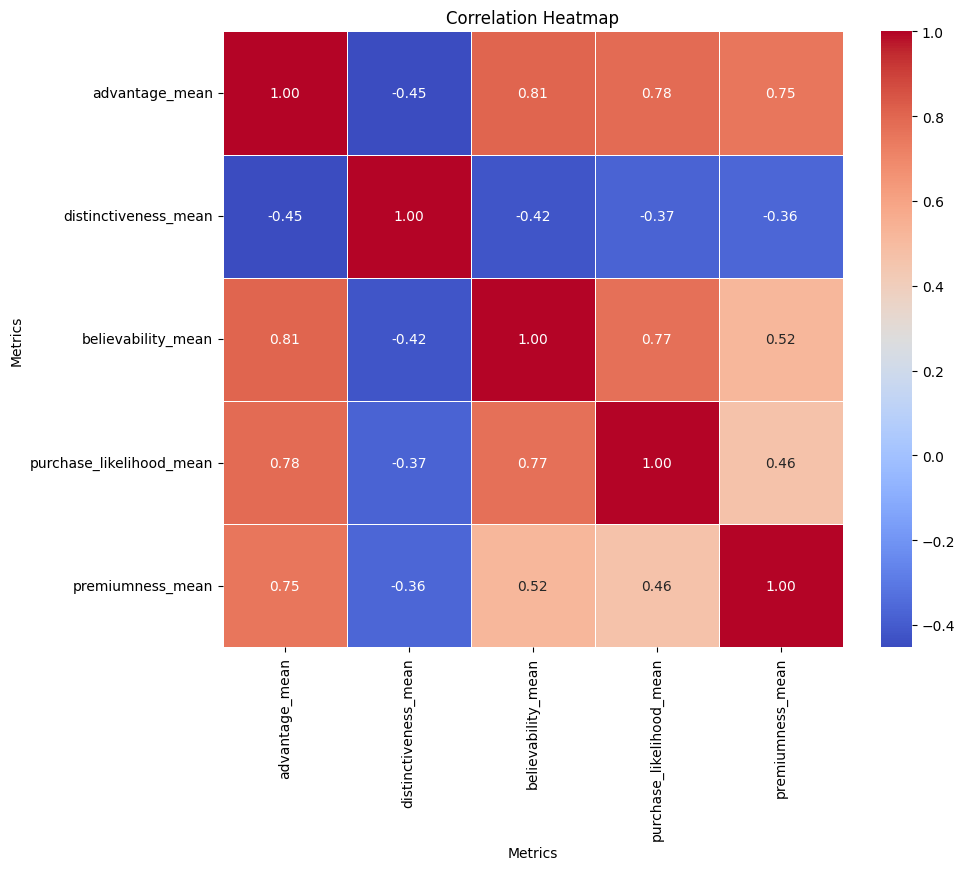

In [35]:
correlation_matrix = combination_metrics_df[metrics].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add labels and title
plt.title("Correlation Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Metrics")

# Show the heatmap
plt.show()

In [36]:
shit_to_drop = [ 'concept_id',
    'advantage_mean', 'advantage_stdev', 'advantage_median',
    'believability_mean', 'believability_stdev', 'believability_median',
    'distinctiveness_mean', 'distinctiveness_stdev', 'distinctiveness_median',
    'purchase_likelihood_mean', 'purchase_likelihood_stdev', 'purchase_likelihood_median',
    'premiumness_mean', 'premiumness_stdev', 'premiumness_median',
    'advantage_top_box', 'distinctiveness_top_box',
    'purchase_likelihood_top_box',
    'believability_top_box',
    'premiumness_top_box'
] + metrics

tags_slice = slice.copy()

print(metrics)

ts = tags_slice.drop(shit_to_drop, axis=1)

ts

['advantage_mean', 'distinctiveness_mean', 'believability_mean', 'purchase_likelihood_mean', 'premiumness_mean']


one or multiple flavors_mapped_clean_One Flavour  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
..                                                ...   
712                                                 1   
713                                                 0   
714                                                 0   
715                                                 0   
716                                                 1   

     one product or product mix_mapped_clean_One Product  \
0                                                    1     
1                                                    1     
2                                                    1     
3                                                    1     
4                                                    1     
..                                                 ...     
712                                                  1     
713                                                  1     
714                                                  1     
715                                                  1     
716                                                  1     

     ingredients mentioned in the flavor names_mapped_clean_Cheese  \
0                                                    0               
1                                                    1               
2                                                    1               
3                                                    1               
4                                                    1               
..                                                 ...               
712                                                  1               
713                                                  1               
714                                                  0               
715                                                  0               
716                                                  1               

     types of snack does it describe_mapped_clean_Puffs  \
0                                                    1    
1                                                    1    
2                                                    1    
3                                                    0    
4                                                    1    
..                                                 ...    
712                                                  0    
713                                                  0    
714                                                  0    
715                                                  0    
716                                                  0    

     types of snack does it describe_mapped_clean_Chips  \
0                                                    0    
1                                                    1    
2                                                    1    
3                                                    0    
4                                                    0    
..                                                 ...    
712                                                  0    
713                                                  0    
714                                                  0    
715                                                  0    
716                                                  0    

     textures described_mapped_clean_Crispy  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
712        

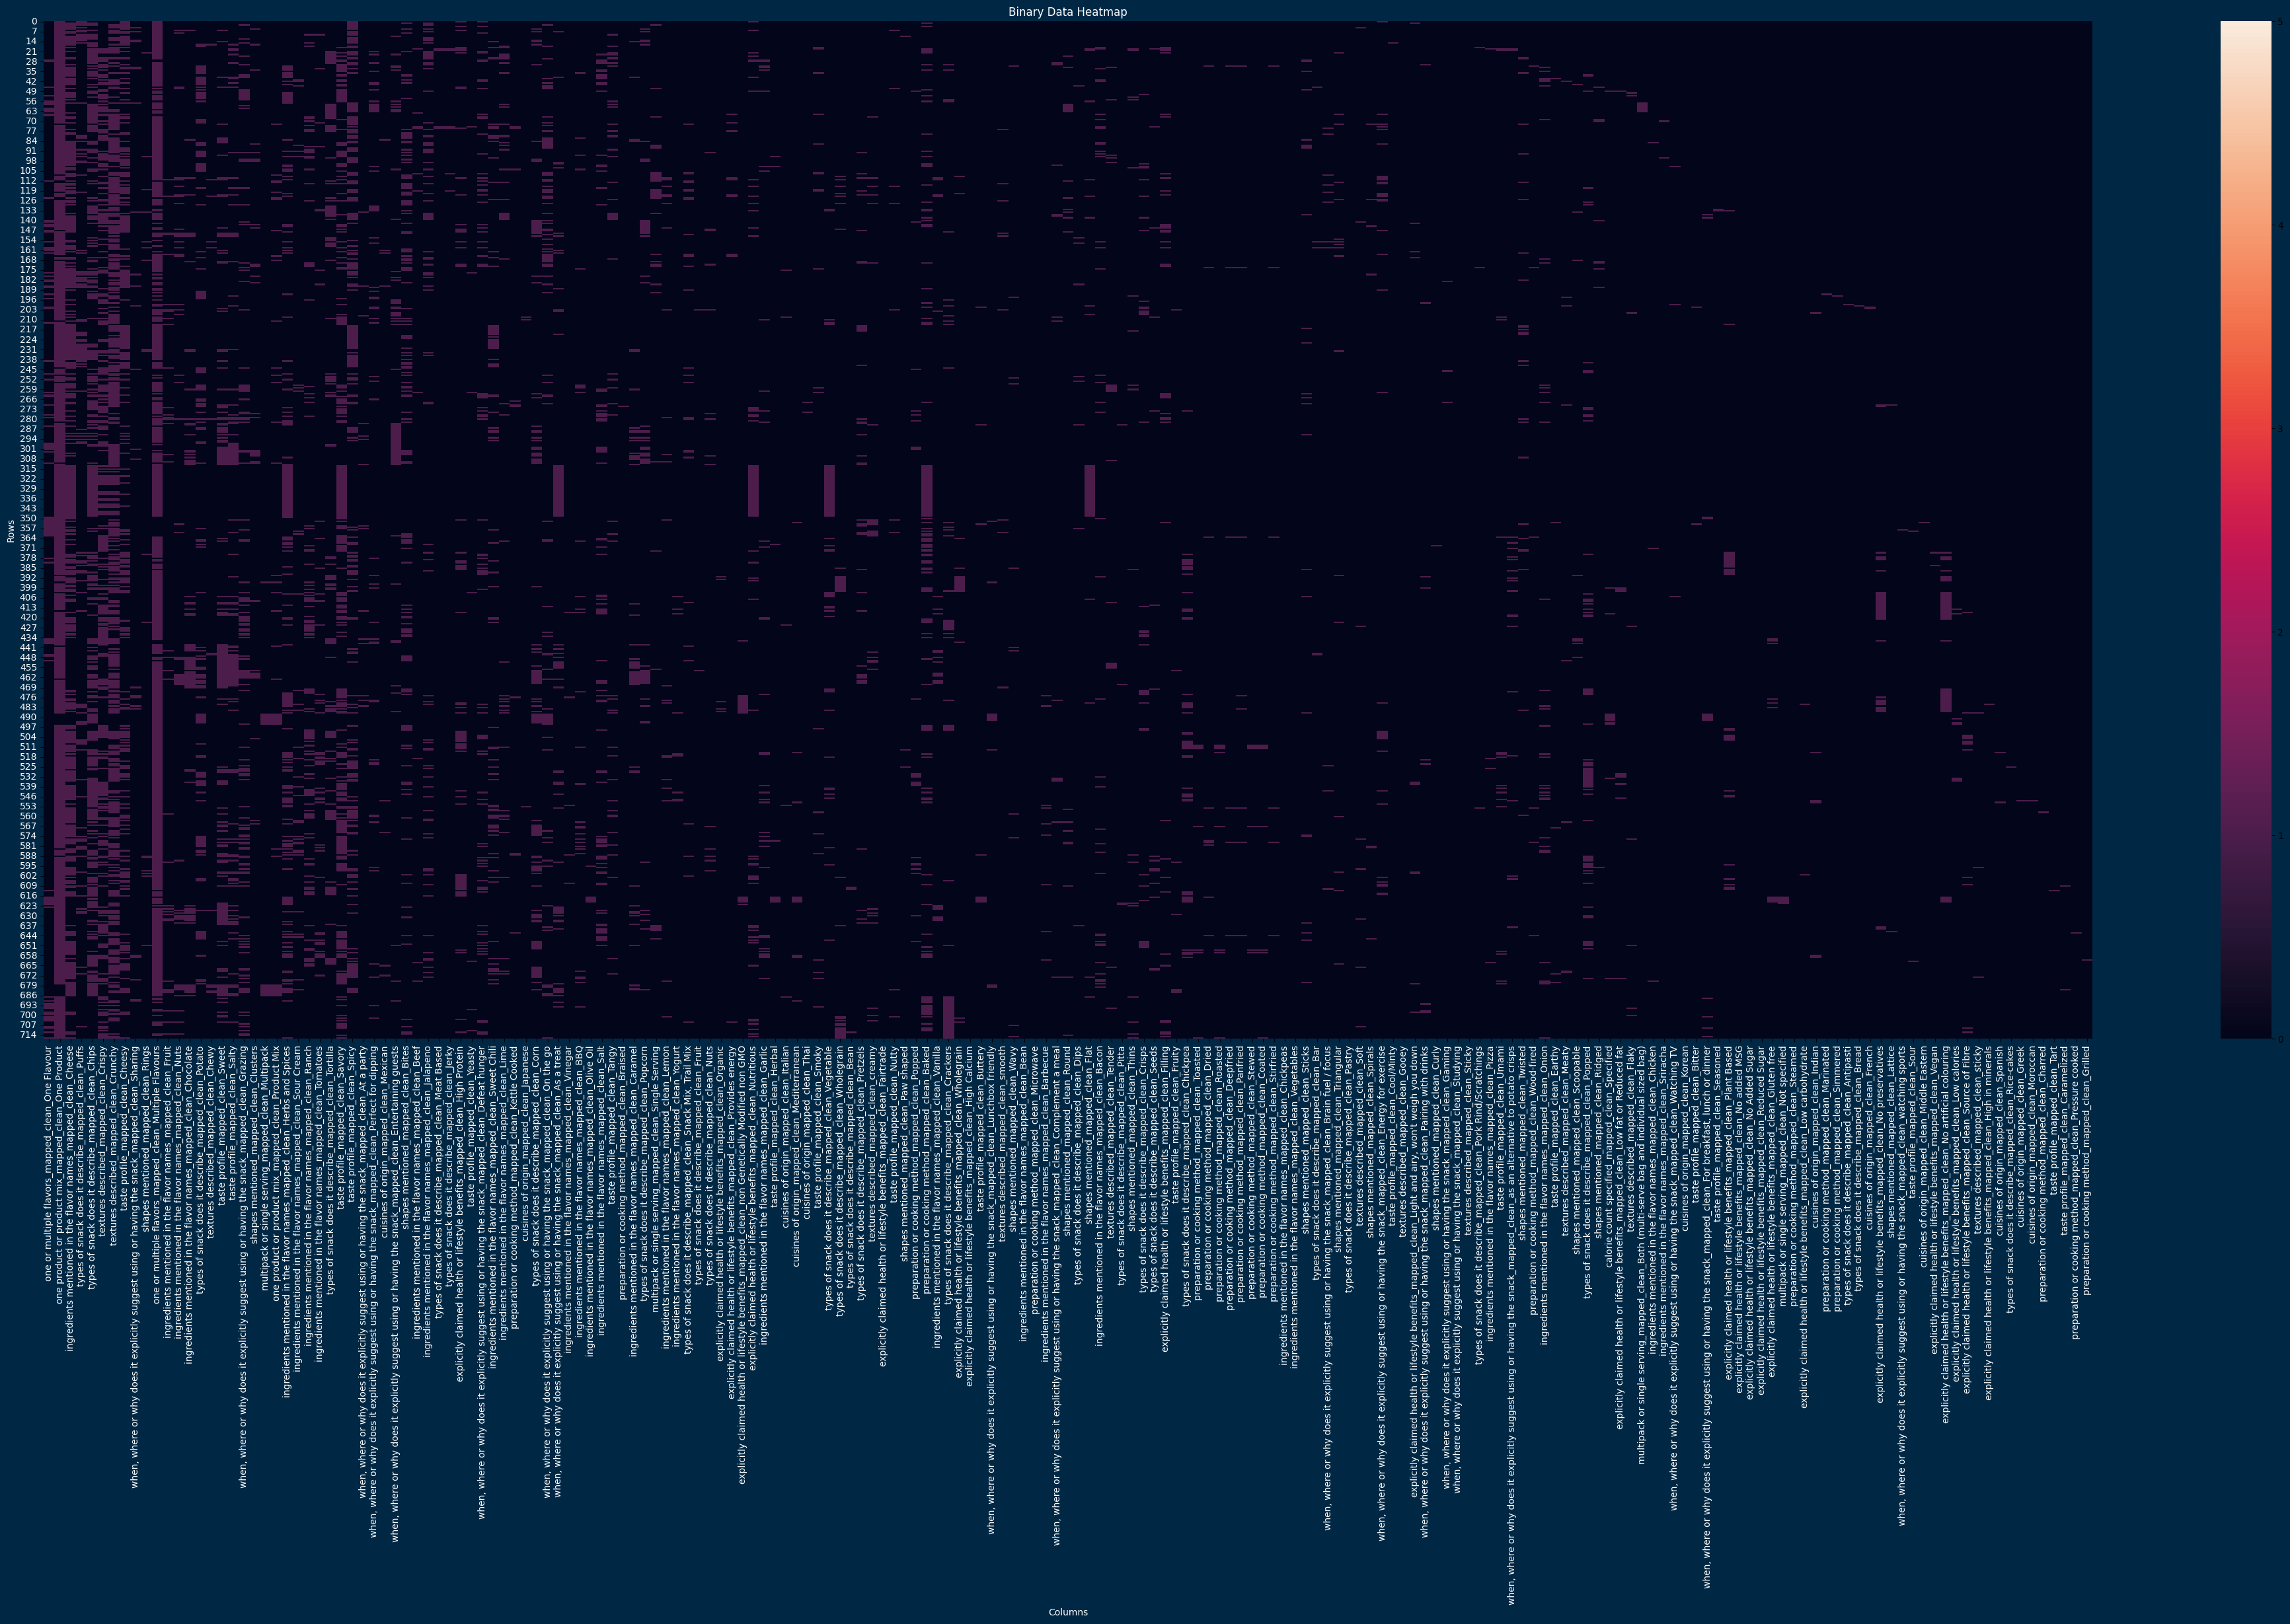

In [54]:
# Calculate the pairwise correlation matrix
ts_correlation_matrix = ts.corr()

# Create a figure with the desired background color
fig, ax = plt.subplots(figsize=(50, 20))
fig.set_facecolor('#002845')  # Set the background color

# Create a heatmap of the binary DataFrame
heatmap = sns.heatmap(ts, cmap='rocket', linecolor='white', cbar=True, annot=False, vmax=5, vmin=0)

# Modify the color of the tick labels to white
heatmap.set_xticklabels(heatmap.get_xticklabels(), color='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white')

plt.title("Binary Data Heatmap", color='white')
plt.xlabel("Columns", color='white')
plt.ylabel("Rows", color='white')

plt.show()


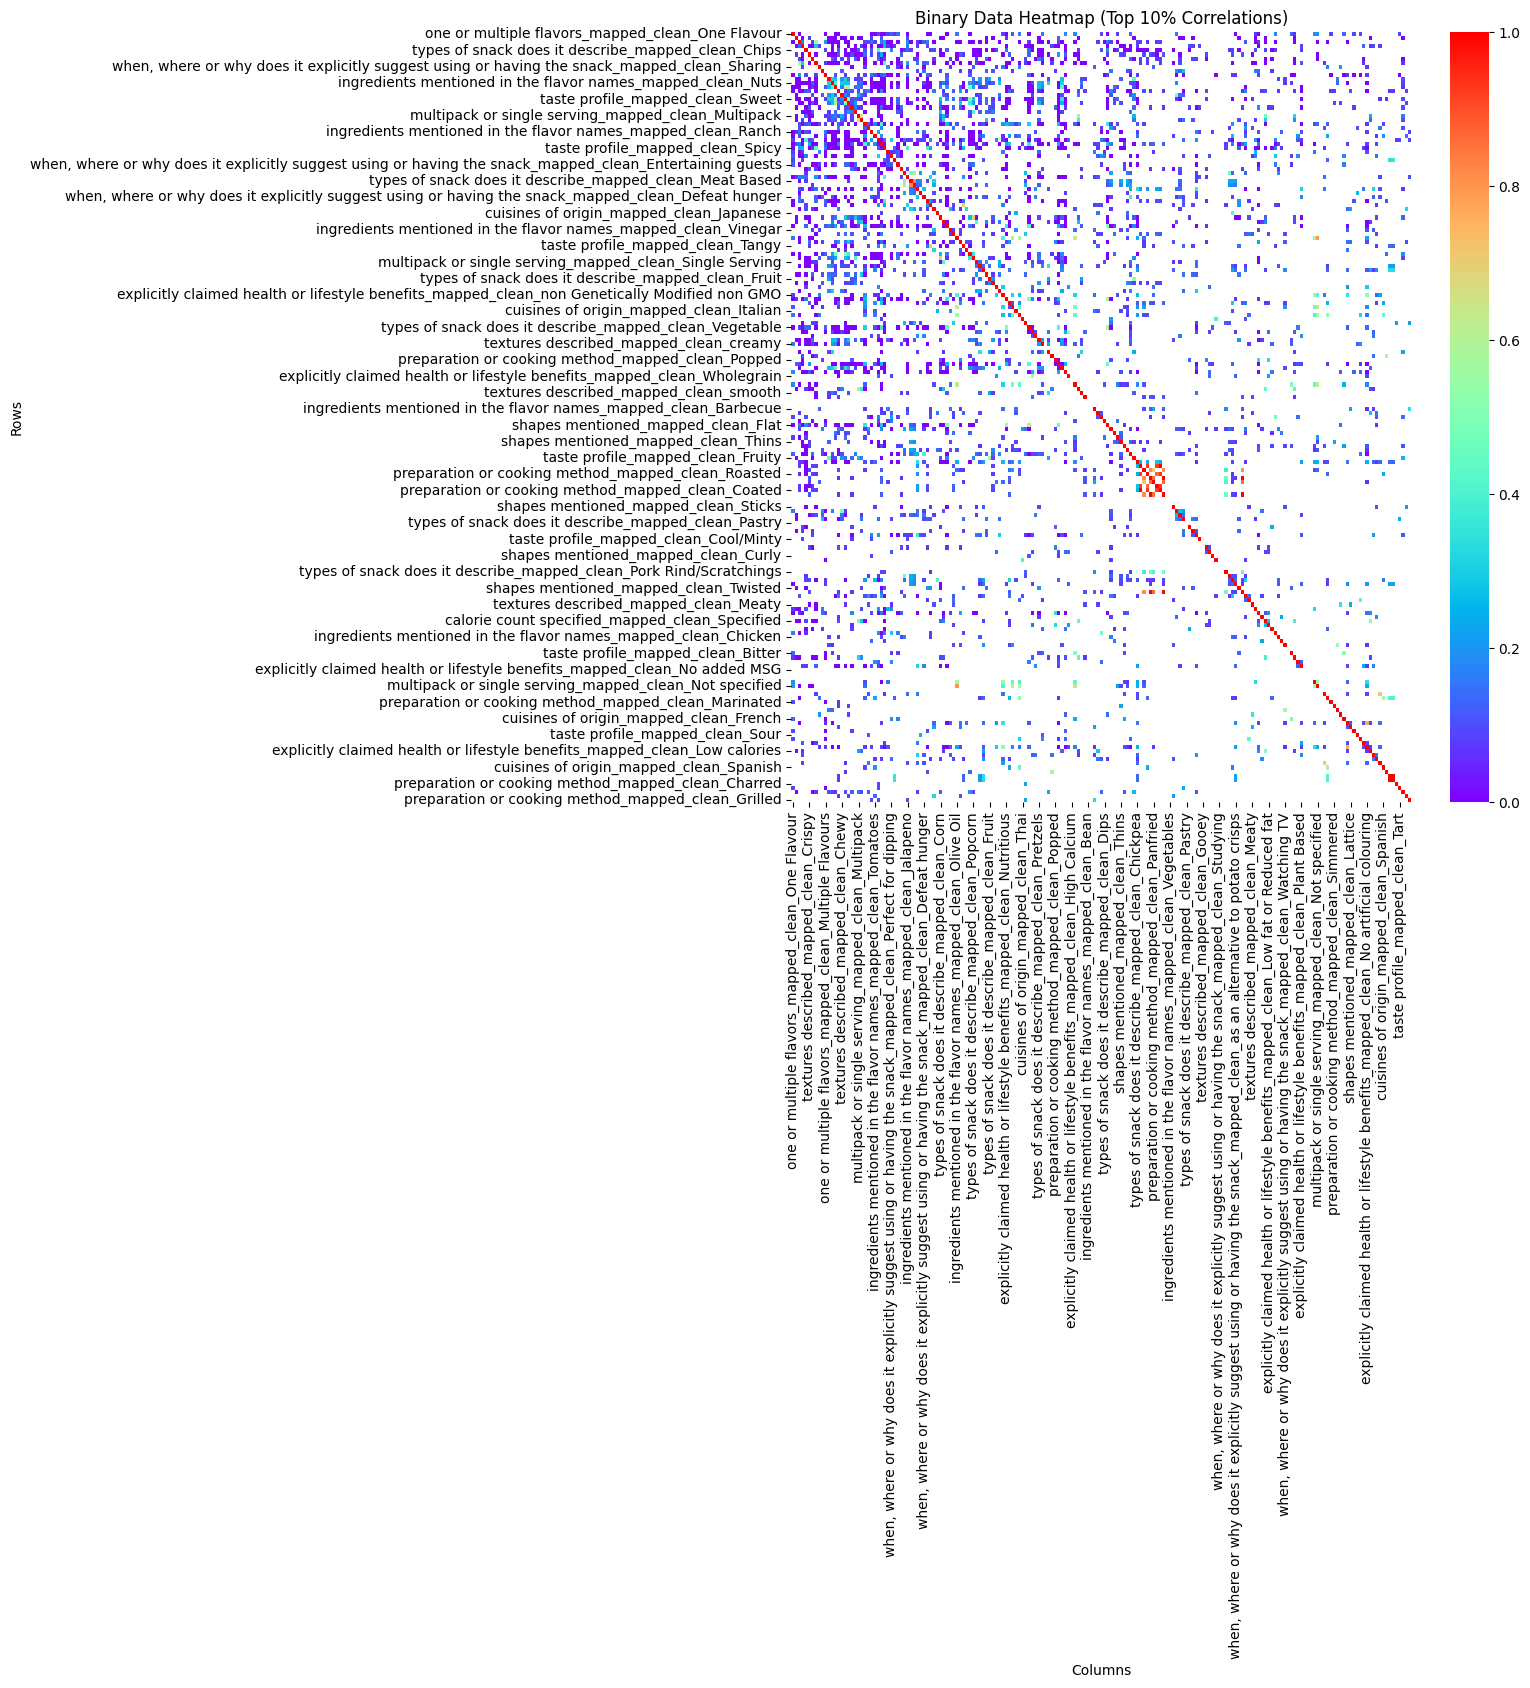

In [38]:
# Calculate the pairwise correlation matrix
ts_correlation_matrix = ts.corr()

# Filter the correlation matrix to keep only the top 10% correlations
top_10_percent = ts_correlation_matrix.stack().quantile(0.9)
ts_correlation_matrix_filtered = ts_correlation_matrix.mask(
    np.abs(ts_correlation_matrix) < top_10_percent, np.nan
)

# Create a heatmap of the filtered correlation matrix
plt.figure(figsize=(10, 10))  # Set the figure size as desired
sns.heatmap(
    ts_correlation_matrix_filtered,
    cmap='rainbow',
    linecolor='blue',
    cbar=True,
    annot=False,
    vmax=1,
    vmin=0,
)  # Use a colormap of your choice
plt.title("Binary Data Heatmap (Top 10% Correlations)")
plt.xlabel("Columns")
plt.ylabel("Rows")

plt.show()


In [ ]:
'''
from scipy import stats

# Creates dictionary to score P-values

P_values_tags_composite = {}

for i, (tag1, tag2, correlation) in enumerate(sorted_positive_pairs):
    for metric in metrics:
        # Separate distinctiveness_mean for Beef and Jalapeno
        metric_tag = tags_slice[tags_slice[tag] == 1][metric]
        metric_not_tag = tags_slice[tags_slice[tag] == 0][metric]
        
        # Perform a t-test to compare premiumness between Beef and Jalapeno
        t_stat, p_value = stats.ttest_ind(metric_tag, metric_not_tag)

        
        # Output the results
        print(tag)
        print("T-statistic:", t_stat)
        print("P-value:", p_value)
        P_values_tags_composite[f"{tag} {metric}"] = p_value
        
        # Check if the difference is statistically significant at a significance level of 0.05
        if p_value < 0.05:
            print(f"There is a statistically significant difference between {tag} and Not {tag} {metric}.")
        else:
            print(f"There is no statistically significant difference between {tag} and Not {tag} {metric}.")



print("\n", P_values_tags_composite.items())
print("\nTag and Metric with most significant difference: ", min(P_values_tags_composite, key=P_values_tags_composite.get))


# Find the 10 minimum values and their corresponding keys
min_items = sorted(P_values_tags_composite.items(), key=lambda x: x[1])[:10]

print("Ten most significant Tag and Metric pairs:")
for key, value in min_items:
    print(f"{key}: {value}")
'''

In [ ]:
combination_metrics_df